Importing all necessary packages

In [0]:
!pip install scikit-learn
!pip install 'nltk==3.4.5'

In [0]:
import re
from sklearn.model_selection import train_test_split

In [0]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import nltk
from nltk import word_tokenize
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import one_hot
from tensorflow.keras import layers
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

Importing Q2 dataset from Drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
path = "drive/My Drive/Colab Dataset/Q2 Dataset.csv"
IMDBQ2 = pd.read_csv(path)

In [0]:
len(IMDBQ2)

60

Pre-processing of raw data

In [0]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [0]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [0]:
X = []
sentences = list(IMDBQ2['review'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [0]:
y = IMDBQ2['sentiment']

y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

Train-Val split in 70:30

In [0]:
X_train,X_val,y_train,y_val=train_test_split(X,y,train_size=0.7, random_state=0)

In [0]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_val=tokenizer.texts_to_sequences(X_val)

In [0]:
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_val = sequence.pad_sequences(X_val, maxlen=max_words)

Model creation with same architecture as the CNN-LSTM of Q1

In [0]:
embedding_length = 64
num_words = 3000
model = Sequential()
model.add(Embedding(num_words, embedding_length, input_length=max_words))
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(256, dropout=0.1))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 64)           192000    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 496, 64)           20544     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 248, 64)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 256)               328704    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 541,505
Trainable params: 541,505
Non-trainable params: 0
________________________________________________

In [0]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=3)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 42 samples, validate on 18 samples
Epoch 1/5
42/42 [==============================] - 8s 181ms/step - loss: 0.6960 - accuracy: 0.4048 - val_loss: 0.6969 - val_accuracy: 0.3889
Epoch 2/5
42/42 [==============================] - 7s 167ms/step - loss: 0.6821 - accuracy: 0.6190 - val_loss: 0.7064 - val_accuracy: 0.3889
Epoch 3/5
42/42 [==============================] - 7s 167ms/step - loss: 1.5362 - accuracy: 0.5714 - val_loss: 3.2806 - val_accuracy: 0.3889
Epoch 4/5
42/42 [==============================] - 7s 166ms/step - loss: 0.9636 - accuracy: 0.5476 - val_loss: 0.6771 - val_accuracy: 0.6111
Epoch 5/5
42/42 [==============================] - 7s 167ms/step - loss: 0.6209 - accuracy: 0.6190 - val_loss: 0.8145 - val_accuracy: 0.3889


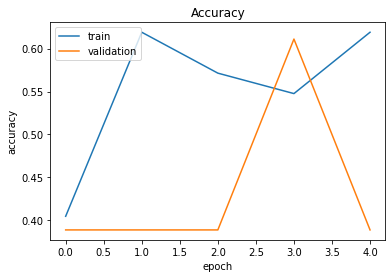

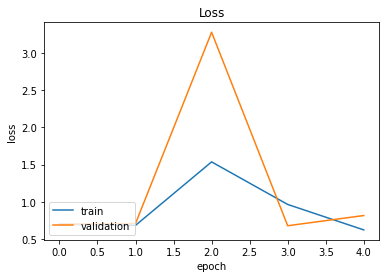

In [0]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='lower left')
plt.show()

Saving model to Local drive

In [0]:
!pip install h5py
model.save('Q2Scratch.h5')

In [0]:
from google.colab import files
files.download("Q2Scratch.h5")